In [1]:
import os
import time
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [38]:
import dask.dataframe as dd

data_list = []
for filename in os.listdir('mct31_data'):
    if filename in ['mct31_7월2주차.csv', 'mct31_7월3주차.csv', 'mct31_7월4주차.csv']:
        continue
    raw_data = dd.read_csv('mct31_data/' + filename, dtype={'F_RunState': 'object'})
    raw_data['GDatetime'] = dd.to_datetime(raw_data['GDatetime']).dt.round('S')
    raw_data = raw_data.compute()  # Dask DataFrame을 Pandas DataFrame으로 변환
    raw_data = raw_data.set_index('GDatetime')
    raw_data['F_RunState'] = raw_data['F_RunState'].fillna('0')
    raw_data['F_RunState'] = raw_data['F_RunState'].map(lambda x: 1 if x == '작업중' else 2 if x == '작업대기' else 3 if x == '작업정지' else 4 if x == 'STOP' else 5 if x == '알람중' else 0)
    # raw_data['F_OperationTime'] = raw_data['F_OperationTime'].fillna(0)
    # raw_data['F_CuttingTime'] = raw_data['F_CuttingTime'].fillna(0)
    raw_data['F_ToolNum'] = raw_data['F_ToolNum'].bfill()
    raw_data = raw_data.drop(['F_AbsoluteX', 'F_AbsoluteY', 'F_AbsoluteZ', 'F_DistanceX', 'F_DistanceY', 'F_DistanceZ', 'G_MRActP', 'G_MPF', 'G_ADC4', 'F_CuttingTime', 'F_OperationTime'], axis=1)
    data_list.append(raw_data.iloc[:, :-6])

df1 = data_list[0]
df2 = data_list[1]
df3 = data_list[2]
df4 = data_list[3]
df5 = data_list[4]
df6 = data_list[5]
df7 = data_list[6]
df8 = data_list[7]

data = pd.concat([df4,df5,df6,df7], axis=0)
data_all = pd.concat(data_list, axis=0)

# Calculate the shifted differences
diffs = np.diff(data['F_ToolNum'], prepend=data['F_ToolNum'][0])

# Initialize transformed list
transformed = [0]  # starting with 0 as the first value

# Iterate over the differences and build the transformed list
for i in range(1, len(diffs)):
    if diffs[i] == 0:
        transformed.append(transformed[i-1])
    else:
        transformed.append(data['F_ToolNum'][i-1])
data['F_ToolNum'] = transformed

# data['G_MP'] = data['G_MV'] * data['G_MA']

data

,F_RunState,F_CycleTime,F_SpindleRPM1,F_SpindleTroq1,F_SpindleGearRatio1,F_ToolNum,G_ADC1,G_ADC2,G_ADC3,G_MV,G_MA,G_MActP,G_MFeq,G_MTemp
GDatetime,,,,,,,,,,,,,,
2023-06-05 07:03:45,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,222.020004,2.974,0.924,59.970001,39.0
2023-06-05 07:03:46,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,221.529999,2.976,0.924,59.970001,39.0
2023-06-05 07:03:47,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,221.529999,2.976,0.924,59.970001,39.0
2023-06-05 07:03:48,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,220.729996,2.976,0.920,59.959999,39.0
2023-06-05 07:03:49,2,0,0.0,0.0,0.0,0.0,24.299999,43.700001,0.0,221.630005,2.962,0.920,59.959999,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-02 23:59:55,0,0,0.0,0.0,0.0,NaN,29.400000,59.400002,0.0,222.529999,0.064,0.004,59.990002,43.0
2023-07-02 23:59:56,0,0,0.0,0.0,0.0,NaN,29.400000,59.400002,0.0,222.529999,0.064,0.004,59.990002,43.0
2023-07-02 23:59:57,0,0,0.0,0.0,0.0,NaN,29.400000,59.400002,0.0,222.679993,0.063,0.004,59.990002,43.0


In [3]:
def highlight_break(ax, sub_df):
    time_ranges_colors = [('00:00:00', '01:00:00', 'red'),
                          ('05:00:00', '06:00:00', 'blue'),
                          ('12:00:00', '13:00:00', 'green'), 
                          ('17:00:00', '18:00:00', 'magenta')]

    # sub_df의 모든 고유한 날짜를 가져옵니다.
    unique_dates = sub_df.index.normalize().unique()

    for start, end, color in time_ranges_colors:
        for date in unique_dates:
            # 각 날짜와 시간대를 결합하여 시작 및 종료 시간을 생성합니다.
            start_time = pd.Timestamp(date.strftime('%Y-%m-%d') + ' ' + start)
            end_time = pd.Timestamp(date.strftime('%Y-%m-%d') + ' ' + end)

            ax.fill_between(sub_df.index, 
                            ax.get_ylim()[0], ax.get_ylim()[1], 
                            where=(sub_df.index >= start_time) & (sub_df.index <= end_time), 
                            color=color, alpha=0.3)

def simple_plot(data, date=None, col=None):
    # col이 None인 경우 모든 열을 선택
    if col is None:
        col = data.columns

    start_time = time.time()
    plt.figure(figsize=(20, len(col)*2))

    # date가 None인 경우 전체 날짜 범위를 선택
    if date is None:
        tmp = data[col]
    elif isinstance(date, tuple):
        tmp = data.loc[date[0]:date[1], col]
    else:
        tmp = data.loc[date].copy()

    for i, column in enumerate(tmp.columns):
        ax = plt.subplot(len(tmp.columns), 1, i + 1)
        plt.plot(tmp[column])
        highlight_break(ax, tmp)

        # y축의 범위를 해당 그래프의 최소값과 최대값으로 설정
        plt.ylim(tmp[column].min(), tmp[column].max())

        mask = tmp['F_RunState'] == 2
        for x_position in tmp[mask].index:
            plt.axvline(x=x_position, color='r', alpha=0.1)
        plt.title(column)

    plt.tight_layout()
    plt.show()

    end_time = time.time()
    print(f'소요 시간 : {(end_time - start_time):.2f} 초')

In [6]:
import plotly.graph_objects as go; import numpy as np
from plotly_resampler import register_plotly_resampler

# Call the register function once and all Figures/FigureWidgets will be wrapped
# according to the register_plotly_resampler its `mode` argument
register_plotly_resampler(mode='auto')


# auto mode: when working in an IPython environment, this will automatically be a 
# FigureWidgetResampler else, this will be an FigureResampler
f = go.Figure()
f.add_trace({"x":data.index, "y":data['F_RunState'], "name": "F_RunState"})
f.add_trace({"x":data.index, "y":data['F_CycleTime'], "name": "F_CycleTime"})
f.add_trace({"x":data.index, "y":data['G_ADC3'], "name": "G_ADC3"})
f.add_trace({"x":data.index, "y":data['F_ToolNum'], "name": 'F_ToolNum'})
f.add_trace({"x":data.index, "y":data['G_MV'], "name": "G_MV"})
f.add_trace({"x":data.index, "y":data['G_MA'], "name": "G_MA"})
f.add_trace({"x":data.index, "y":data['G_MFeq'], "name": "G_MFeq"})
f.add_trace({"x":data.index, "y":data['G_MTemp'], "name": "G_MTemp"})
f

FigureWidgetResampler({
    'data': [{'name': '<b style="color:sandybrown">[R]</b> F_RunState <i style="color:#fc9944">~40m</i>',
              'type': 'scatter',
              'uid': 'deba8cae-2a18-471f-8882-4750f76f7a97',
              'x': array([datetime.datetime(2023, 6, 5, 7, 3, 45),
                          datetime.datetime(2023, 6, 5, 7, 23, 43),
                          datetime.datetime(2023, 6, 5, 7, 43, 40), ...,
                          datetime.datetime(2023, 7, 2, 22, 20, 14),
                          datetime.datetime(2023, 7, 2, 23, 0, 8),
                          datetime.datetime(2023, 7, 2, 23, 59, 59)], dtype=object),
              'y': array([2, 4, 1, ..., 0, 0, 0], dtype=int64)},
             {'name': ('<b style="color:sandybrown">[R' ... 'style="color:#fc9944">~40m</i>'),
              'type': 'scatter',
              'uid': '2562df3a-a90f-442f-ac0b-a108f7ad4819',
              'x': array([datetime.datetime(2023, 6, 5, 7, 3, 45),
                          

In [23]:
data

,F_RunState,F_CycleTime,F_SpindleRPM1,F_SpindleTroq1,F_SpindleGearRatio1,F_ToolNum,G_ADC1,G_ADC2,G_ADC3,G_MV,G_MA,G_MActP,G_MFeq,G_MTemp
GDatetime,,,,,,,,,,,,,,
2023-06-05 07:03:45,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,222.020004,2.974,0.924,59.970001,39.0
2023-06-05 07:03:46,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,221.529999,2.976,0.924,59.970001,39.0
2023-06-05 07:03:47,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,221.529999,2.976,0.924,59.970001,39.0
2023-06-05 07:03:48,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,220.729996,2.976,0.920,59.959999,39.0
2023-06-05 07:03:49,2,0,0.0,0.0,0.0,0.0,24.299999,43.700001,0.0,221.630005,2.962,0.920,59.959999,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-02 23:59:55,0,0,0.0,0.0,0.0,NaN,29.400000,59.400002,0.0,222.529999,0.064,0.004,59.990002,43.0
2023-07-02 23:59:56,0,0,0.0,0.0,0.0,NaN,29.400000,59.400002,0.0,222.529999,0.064,0.004,59.990002,43.0
2023-07-02 23:59:57,0,0,0.0,0.0,0.0,NaN,29.400000,59.400002,0.0,222.679993,0.063,0.004,59.990002,43.0


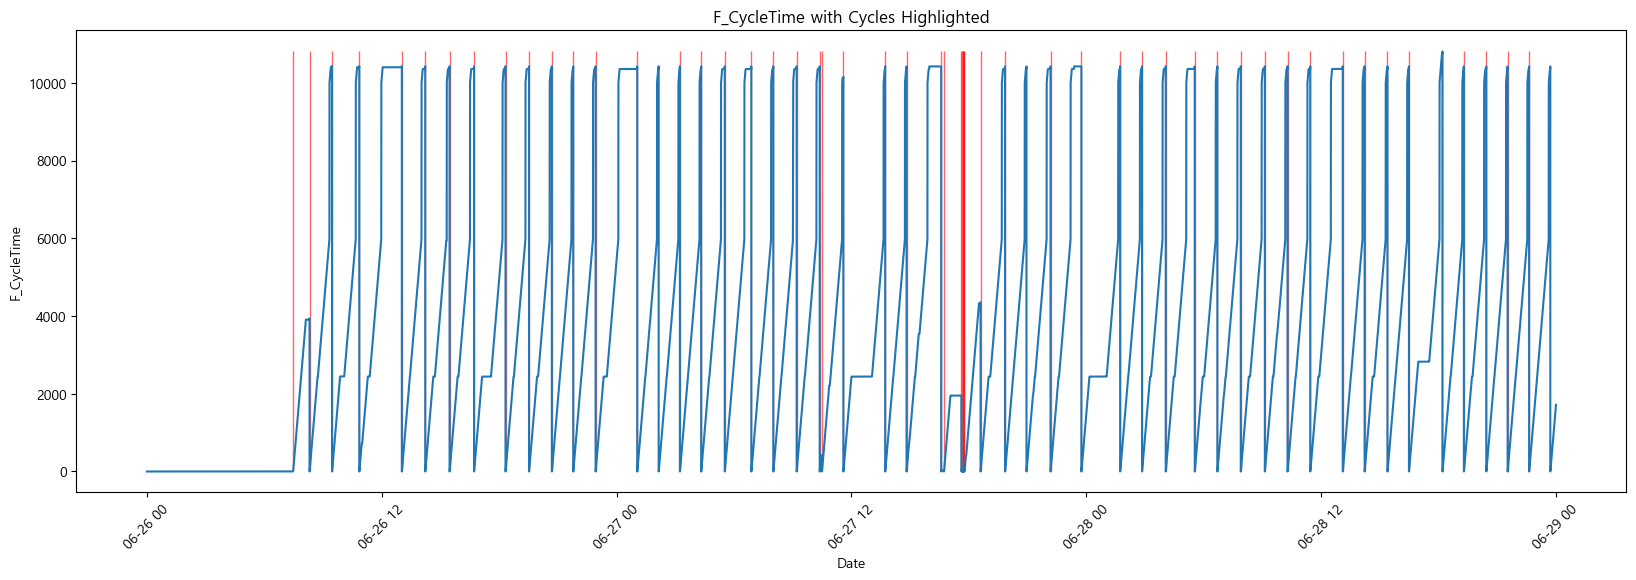

In [25]:
# Extract the 'F_CycleTime' column
cycle_time = data.loc['2023-06-26':'2023-06-28']['F_CycleTime']

# Plot the 'F_CycleTime' values
plt.figure(figsize=(20, 6))
plt.plot(cycle_time.index, cycle_time.values)

# Find the cycles by detecting the points where the value drops to zero
start_idx = []
for i in range(1, len(cycle_time) - 1):
    if cycle_time.iloc[i - 1] > 0 and cycle_time.iloc[i] == 0:
        start_idx.append(i)

# Fill between the start and end points of each cycle
for i in start_idx:
    start = cycle_time.index[i]
    # Find the next zero crossing
    end = cycle_time.index[np.where(cycle_time.iloc[i:] == 0)[0][0] + i]
    plt.fill_betweenx(y=[0, cycle_time.max()], x1=start, x2=end, color='g', alpha=0.3)

plt.title('F_CycleTime with Cycles Highlighted')
plt.ylabel('F_CycleTime')
plt.xlabel('Date')
plt.show()


In [43]:
data = data.reset_index()

# F_CycleTime의 차이 계산 및 라벨링
data['Label'] = (data['F_CycleTime'].shift(1) - data['F_CycleTime']).fillna(2)

# 양수인 라벨의 인덱스 추출
positive_label_indices = data[data['Label'] > 0].index

# 구간별 라벨링
current_label = 1
for i in range(len(positive_label_indices)):
    start_idx = positive_label_indices[i]
    if i < len(positive_label_indices) - 1:
        end_idx = positive_label_indices[i + 1]
    else:
        end_idx = len(data) - 1
    data.loc[start_idx:end_idx, 'Interval_Label'] = current_label
    current_label += 1

# 결과 출력
data = data.drop(['Label'], axis=1)
# data['GDatetime'] = pd.to_datetime('GDatetime')
data = data.set_index('GDatetime')
data

,index,F_RunState,F_CycleTime,F_SpindleRPM1,F_SpindleTroq1,F_SpindleGearRatio1,F_ToolNum,G_ADC1,G_ADC2,G_ADC3,G_MV,G_MA,G_MActP,G_MFeq,G_MTemp,Interval_Label
GDatetime,,,,,,,,,,,,,,,,
2023-06-05 07:03:45,0,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,222.020004,2.974,0.924,59.970001,39.0,1.0
2023-06-05 07:03:46,1,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,221.529999,2.976,0.924,59.970001,39.0,1.0
2023-06-05 07:03:47,2,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,221.529999,2.976,0.924,59.970001,39.0,1.0
2023-06-05 07:03:48,3,2,0,0.0,0.0,0.0,0.0,24.400000,43.700001,0.0,220.729996,2.976,0.920,59.959999,39.0,1.0
2023-06-05 07:03:49,4,2,0,0.0,0.0,0.0,0.0,24.299999,43.700001,0.0,221.630005,2.962,0.920,59.959999,39.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-02 23:59:55,2353520,0,0,0.0,0.0,0.0,NaN,29.400000,59.400002,0.0,222.529999,0.064,0.004,59.990002,43.0,431.0
2023-07-02 23:59:56,2353521,0,0,0.0,0.0,0.0,NaN,29.400000,59.400002,0.0,222.529999,0.064,0.004,59.990002,43.0,431.0
2023-07-02 23:59:57,2353522,0,0,0.0,0.0,0.0,NaN,29.400000,59.400002,0.0,222.679993,0.063,0.004,59.990002,43.0,431.0


In [44]:
data.drop('index', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2353525 entries, 2023-06-05 07:03:45 to 2023-07-02 23:59:59
Data columns (total 15 columns):
 #   Column               Dtype  
---  ------               -----  
 0   F_RunState           int64  
 1   F_CycleTime          int64  
 2   F_SpindleRPM1        float64
 3   F_SpindleTroq1       float64
 4   F_SpindleGearRatio1  float64
 5   F_ToolNum            float64
 6   G_ADC1               float64
 7   G_ADC2               float64
 8   G_ADC3               float64
 9   G_MV                 float64
 10  G_MA                 float64
 11  G_MActP              float64
 12  G_MFeq               float64
 13  G_MTemp              float64
 14  Interval_Label       float64
dtypes: float64(13), int64(2)
memory usage: 287.3 MB


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

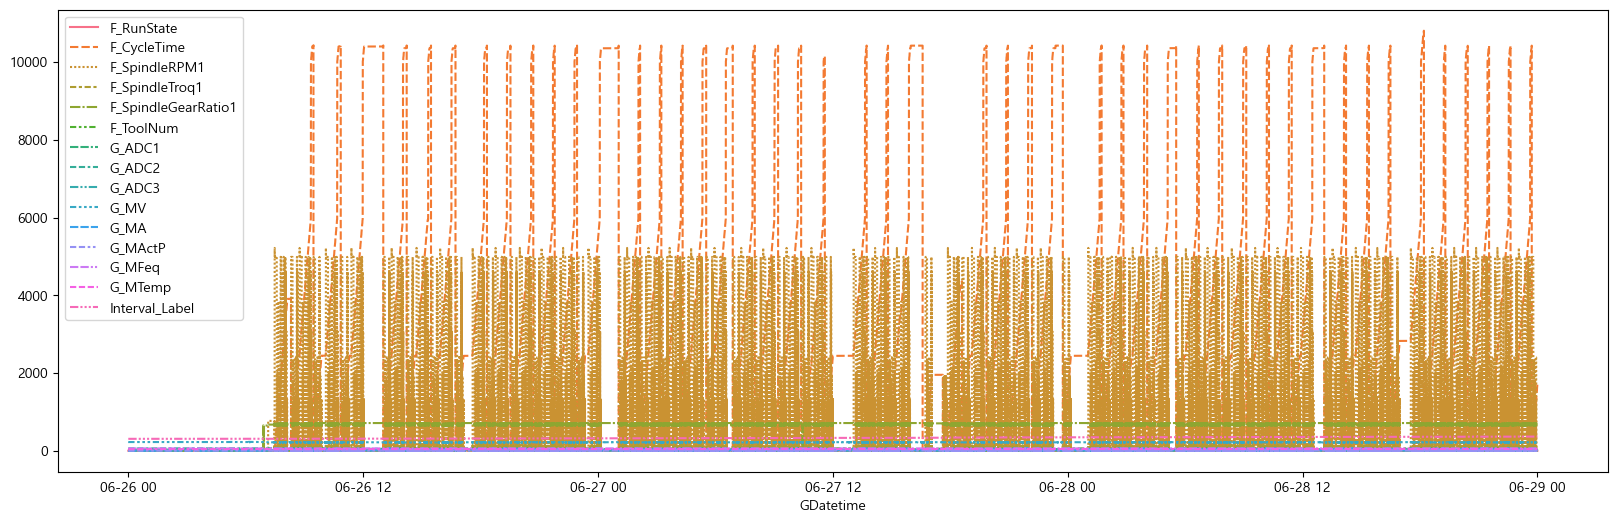

In [46]:
cycle_time = data.loc['2023-06-26':'2023-06-28']

plt.figure(figsize=(20, 6))
sns.lineplot(data=cycle_time)

# Define a color mapping for the unique values in 'F_CycleTime'
colors = {0: 'g', 1: 'r', 2: 'b'}  # Example mapping

# Iterate through the 'F_CycleTime' column
for i in range(1, len(cycle_time) - 1):
    current_value = cycle_time.iloc[i]
    previous_value = cycle_time.iloc[i - 1]
    
    # Check if the value has changed
    if current_value != previous_value:
        # Fill the area between the current index and the previous index with the corresponding color
        plt.fill_betweenx(y=[0, cycle_time.iloc[i-1:i+1].max()], x1=i - 1, x2=i, color=colors[current_value], alpha=0.3)

plt.title('F_CycleTime with Different Colors for Each Value')
plt.ylabel('F_CycleTime')
plt.xlabel('Index')
plt.show()
